# SDES Project 1: LC tank with Resistance with constant Voltage applied

In [91]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [92]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from tempfile import NamedTemporaryFile
from IPython.display import HTML

## R is the Resitance, L is the Inductance and C is the Capacitance in the circuit. 'Voltage' is the voltage applied. 'Initial_Current' is the initial current across the Inductor. 'Initial_Charge' is the initial charge in the Conductor. 'Tf' is the total run time of the simulation. 

### The below function will take the Voltage, Resistance, Inductance, Capacitance as the inputs and return Voltage across all the three elements and Time of the simulation

In [93]:
def Voltage_RLC(Voltage,R,L,C,Initial_Charge=0.0,Initial_Current=0.0,Tf=20):
    Time=np.linspace(0.0,Tf,1000)
    Particular_charge=C*Voltage
    Delta = (R/C)**2 - 4.0/(L*C) + 0.0j
    r1 = (-(R/C)-np.sqrt(Delta))/2.0
    r2 = (-(R/C)+np.sqrt(Delta))/2.0
    if r1 != r2:
        C1 = (r2*(Initial_Charge - C*Voltage) - Initial_Current)/(r2-r1)
        C2 = (r1*(Initial_Charge - C*Voltage) - Initial_Current)/(r1-r2)
        Charge = C*Voltage + C1*np.exp(r1*Time) + C2*np.exp(r2*Time)
        Current = r1*C1*np.exp(r1*Time) + r2*C2*np.exp(r2*Time)
    else:
        C1 = Initial_Current - r1*(Initial_Charge - C*Voltage)
        C2 = Initial_Charge - C*Voltage
        Charge = np.exp(r1*Time)*(C1*Time + C2) + C*Voltage
        Current = np.exp(r1*Time)*((r1*Time+1.0)*C1 + r1*C2)
    return Current*R,Voltage-Charge/C-Current*R,Charge/C,Time

### The plots of the Voltages across the elements in the circuit for Underdamped case 

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


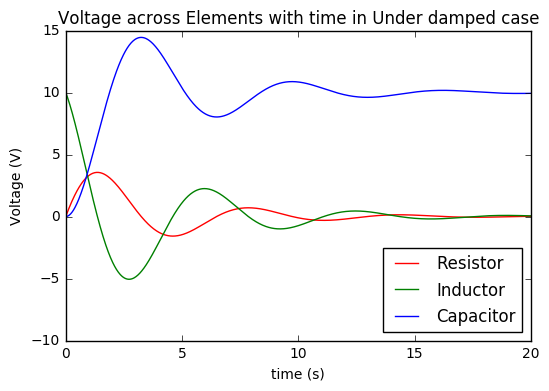

In [94]:
Voltage_R_ud,Voltage_L_ud,Voltage_C_ud,Time_ud=Voltage_RLC(10,0.5,1,1)
plt.plot(Time_ud,Voltage_R_ud,'r',label = 'Resistor')
plt.plot(Time_ud,Voltage_L_ud,'g',label = 'Inductor')
plt.plot(Time_ud,Voltage_C_ud,'b',label = 'Capacitor')
plt.title('Voltage across Elements with time in Under damped case')
plt.ylabel('Voltage (V)')
plt.xlabel('time (s)')
plt.legend(loc = 'lower right')
plt.savefig('voltage_across_elements_in_Underdamped_case.png')

### The plots of the Voltages across the elements in the circuit for Critically damped case 

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


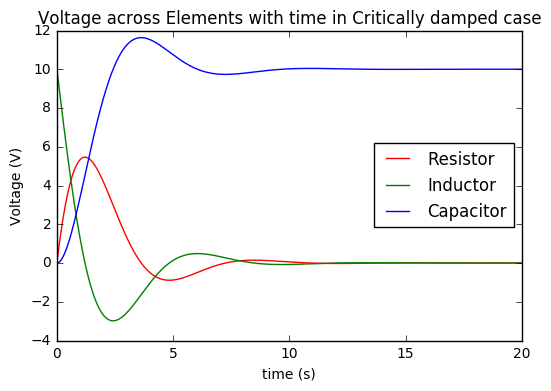

In [95]:
Voltage_R_cd,Voltage_L_cd,Voltage_C_cd,Time_cd=Voltage_RLC(10,1,1,1)
plt.plot(Time_cd,Voltage_R_cd,'r',label = 'Resistor')
plt.plot(Time_cd,Voltage_L_cd,'g',label = 'Inductor')
plt.plot(Time_cd,Voltage_C_cd,'b',label = 'Capacitor')
plt.title('Voltage across Elements with time in Critically damped case')
plt.ylabel('Voltage (V)')
plt.xlabel('time (s)')
plt.legend(loc = 'center right')
plt.savefig('voltage_across_elements_in_Criticallydamped_case.png')

### The plots of the Voltages across the elements in the circuit for Over damped case 

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


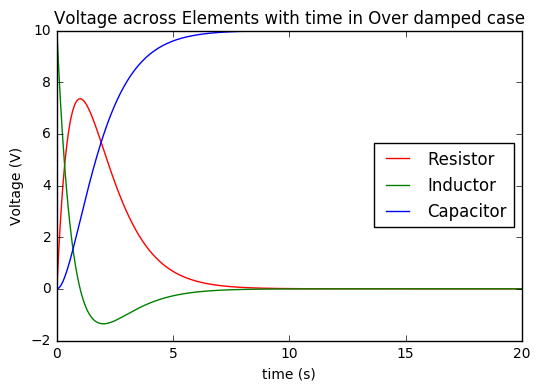

In [96]:
Voltage_R_od,Voltage_L_od,Voltage_C_od,Time_od=Voltage_RLC(10,2,1,1)
plt.plot(Time_od,Voltage_R_od,'r',label = 'Resistor')
plt.plot(Time_od,Voltage_L_od,'g',label = 'Inductor')
plt.plot(Time_od,Voltage_C_od,'b',label = 'Capacitor')
plt.title('Voltage across Elements with time in Over damped case')
plt.ylabel('Voltage (V)')
plt.xlabel('time (s)')
plt.legend(loc = 'center right')
plt.savefig('voltage_across_elements_in_Overdamped_case.png')


## Code required for animation

In [97]:
VIDEO_TAG = """<video controls>
     <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
     Your browser does not support the video tag.
    </video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")

    return VIDEO_TAG.format(anim._encoded_video)

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [98]:
def animate(X1,Y1,X2,Y2,X3,Y3,name):
    fig = plt.figure()
    ax = plt.axes(xlim=(0,20.0), ylim=(-10.,20.))
    line, = ax.plot([], [], lw=2)
    line1, = ax.plot([], [], lw=2)
    line2, = ax.plot([], [], lw=2)

    def init():
        line.set_data([],[])
        line1.set_data([],[])
        line2.set_data([],[])
        return line,line1,line2,
    
    def animate(i):
        line.set_data(X1[:i], Y1[:i])
        line1.set_data(X2[:i],Y2[:i])
        line2.set_data(X3[:i],Y3[:i])
        return line,line1,line2,
        
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=2, blit=True)
    anim.save(name+'.mp4', fps=120, extra_args=['-vcodec', 'libx264'])
    plt.show()

## Animation for Under damped case

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


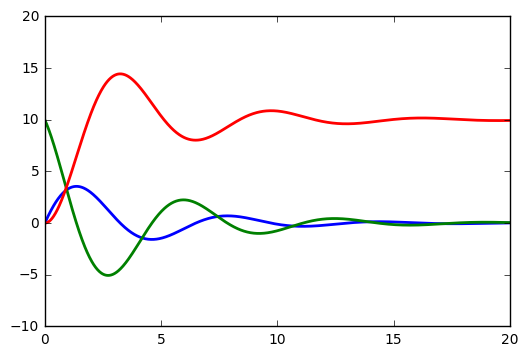

In [99]:
animate(Time_ud,Voltage_R_ud,Time_ud,Voltage_L_ud,Time_ud,Voltage_C_ud,'voltage_across_elements_in_a_under_damped case')

## Animation for Critically damped case 

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


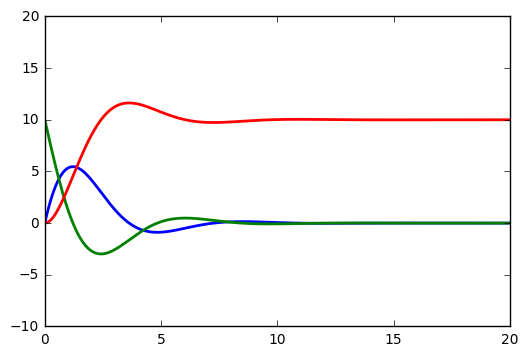

In [100]:
animate(Time_cd,Voltage_R_cd,Time_cd,Voltage_L_cd,Time_cd,Voltage_C_cd,'voltage_across_elements_in_Critically_damped_case')
    

## Animation for Over Damped case

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


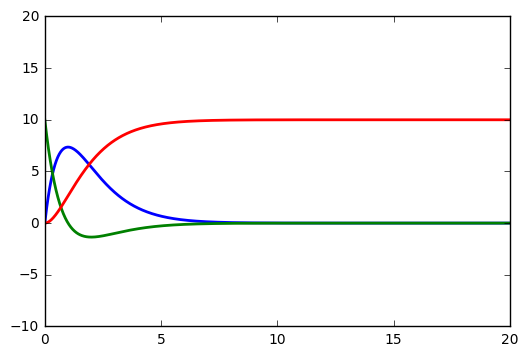

In [101]:
animate(Time_od,Voltage_R_od,Time_od,Voltage_L_od,Time_od,Voltage_C_od,'voltage_across_elements_in_overdamped_case')
    